In [1]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
t = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(t, t)
A = np.array([[1, 0.7], [0.7, 1]])
x = np.array([X, Y]).swapaxes(0, 1).swapaxes(1, 2)
Z = np.array([p.dot(A).dot(p) for xr in x for p in xr]).reshape(X.shape)
Z = np.clip(Z, 1e-2, 1e3)
Z2 = np.array([p.dot(p) for xr in x for p in xr]).reshape(X.shape)

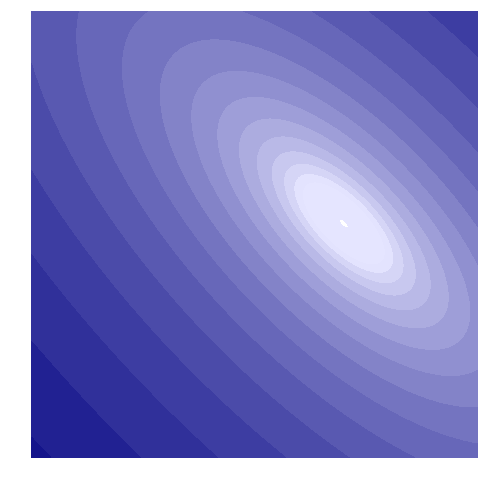

In [12]:
fig = plt.figure()
fig.patch.set_alpha(0.0)
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.contourf(X, Y, Z, np.logspace(-2, 2.7, 30),
            norm=mpl.colors.LogNorm(vmin=1),
            cmap=sns.light_palette("navy", as_cmap=True))
plt.savefig('cost_fun1.pdf', dpi=150)

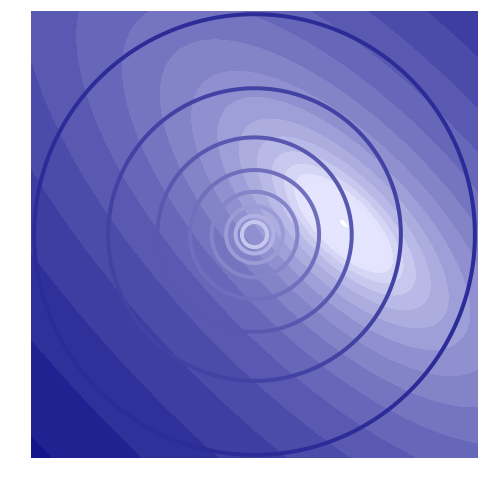

In [13]:
fig = plt.figure()
fig.patch.set_alpha(0.0)
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.contourf(X, Y, Z, np.logspace(-2, 2.7, 30),
            norm=mpl.colors.LogNorm(vmin=1),
            cmap=sns.light_palette("navy", as_cmap=True))
ax.contour(X, Y, Z2, np.logspace(-.5, 2.7, 10),
           norm=mpl.colors.LogNorm(vmin=0.1),
           cmap=sns.light_palette("navy", as_cmap=True), linewidths=4)
plt.savefig('cost_fun2.pdf', dpi=150)

### Matrix factorization

In [28]:
z0 = np.array([4, 0.5])
A = np.array([[.2, 0.1], [.1, 2]])
Z = np.array([(p- z0).dot(A).dot(p-z0) for xr in x for p in xr]).reshape(X.shape)/2
Z1 = 1*(abs(X) + abs(Y))

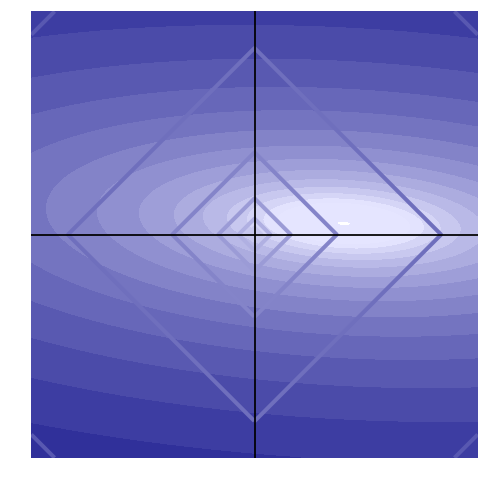

In [29]:
fig = plt.figure()
fig.patch.set_alpha(0.0)
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.contourf(X, Y, Z, np.logspace(-2, 2.7, 30),
            norm=mpl.colors.LogNorm(vmin=1),
            cmap=sns.light_palette("navy", as_cmap=True))
ax.contour(X, Y, Z1, np.logspace(-.5, 2.7, 10),
           norm=mpl.colors.LogNorm(vmin=0.1),
           cmap=sns.light_palette("navy", as_cmap=True), linewidths=4)
plt.hlines(0, -10, 10, 'k')
plt.vlines(0, -10, 10, 'k')
plt.savefig('matrix_facto.pdf', dpi=150)